In [3]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [4]:
gpt_out_path = 'gpt-2_output/'


In [5]:
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99], 'flat':[0.01, 0.02, 0.05],
'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }

In [6]:
import random
keys =  list(vals_dict.keys())      # Python 3; use keys = d.keys() in Python 2
random.shuffle(keys)
lol = [(key, vals_dict[key]) for key in keys]
lol = dict(lol)

In [7]:
dict(lol)

{'k': [1, 10, 40, 200],
 'flat': [0.01, 0.02, 0.05],
 'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'n': [0.1, 0.25, 0.5, 0.75, 0.9]}

In [20]:
times = []
for key,all_params in vals_dict.items():
    for par in all_params:
        for seed in [28,56,10,40,9]:
            time = pickle.load( gzip.open(gpt_out_path+'time_taken_for_all_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts_'+str(seed)+'-seed.pickle.gz', 'rb'))
            times.append((key, seed, par, time))

In [21]:
times = pd.DataFrame(times, columns=['sampling_method', 'seed', 'param', 'batch_times'])

In [22]:
times.head()

,sampling_method,seed,param,batch_times
0,tfs,28,0.25,"[16.398897886276245, 13.30475378036499, 12.253..."
1,tfs,56,0.25,"[15.460532426834106, 12.692554473876953, 12.32..."
2,tfs,10,0.25,"[16.009279251098633, 13.556094646453857, 12.26..."
3,tfs,40,0.25,"[16.38942527770996, 12.428743362426758, 12.434..."
4,tfs,9,0.25,"[15.758391380310059, 12.366420030593872, 12.55..."


In [25]:
times = pd.concat((times, pd.DataFrame(times.batch_times.tolist())), axis=1)

In [26]:
times.head()

,sampling_method,seed,param,batch_times,0,1,2,3
0,tfs,28,0.25,"[16.398897886276245, 13.30475378036499, 12.253...",16.398898,13.304754,12.253953,14.350190
1,tfs,56,0.25,"[15.460532426834106, 12.692554473876953, 12.32...",15.460532,12.692554,12.329321,12.320097
2,tfs,10,0.25,"[16.009279251098633, 13.556094646453857, 12.26...",16.009279,13.556095,12.263982,14.366214
3,tfs,40,0.25,"[16.38942527770996, 12.428743362426758, 12.434...",16.389425,12.428743,12.434892,12.394531
4,tfs,9,0.25,"[15.758391380310059, 12.366420030593872, 12.55...",15.758391,12.366420,12.550798,12.616135


In [65]:
g = times.groupby(['sampling_method', 'param'])[[1,2,3]].groups #sum() #.apply(lambda x: x.flatten())

In [71]:
v

,sampling_method,seed,param,batch_times,0,1,2,3
25,flat,28,0.01,"[16.551060676574707, 12.343384981155396, 12.23...",16.551061,12.343385,12.232779,12.262170
26,flat,56,0.01,"[16.57393217086792, 12.239759683609009, 12.390...",16.573932,12.239760,12.390240,12.402951
27,flat,10,0.01,"[16.00662088394165, 12.874234199523926, 12.415...",16.006621,12.874234,12.415731,12.330000
28,flat,40,0.01,"[16.040360689163208, 12.658217430114746, 12.62...",16.040361,12.658217,12.625616,12.614241
29,flat,9,0.01,"[15.906652688980103, 12.512413740158081, 12.31...",15.906653,12.512414,12.319931,12.439473


In [72]:
flat_vals = dict()
for key, inds in g.items():
    v = times.iloc[inds]
    flat_vals[key] =v[[1,2,3]].values.flatten()

In [73]:
flat_vals

{('flat',
  0.01): array([12.34338498, 12.23277903, 12.2621696 , 12.23975968, 12.39024019,
        12.40295124, 12.8742342 , 12.41573071, 12.32999969, 12.65821743,
        12.62561631, 12.61424088, 12.51241374, 12.31993103, 12.43947268]),
 ('flat',
  0.02): array([12.50078368, 12.31879234, 12.38474035, 12.45705175, 12.27873731,
        12.27324653, 12.37104487, 12.41814065, 12.36512375, 12.70480776,
        12.52642632, 12.5500567 , 12.58753061, 12.63035774, 12.52335072]),
 ('flat',
  0.05): array([12.37733316, 12.37195396, 12.31761217, 12.55178738, 12.3976388 ,
        12.43615532, 12.42314196, 12.50084877, 12.48045516, 12.5683701 ,
        12.55477834, 12.59794784, 12.33927751, 12.38673878, 12.42568827]),
 ('k',
  1.0): array([10.83744431, 10.91897321, 10.89229965, 10.96131849, 10.95946407,
        10.87668967, 10.84562516, 10.8638258 , 10.86553168, 10.91497946,
        10.88585448, 10.93488503, 10.84209323, 10.79965234, 10.87218285]),
 ('k',
  10.0): array([10.87513828, 10.80159402,

In [77]:
flat_vals = pd.DataFrame.from_dict(flat_vals).T

In [78]:
flat_vals.head()

0          1          2          3          4          5   \
flat 0.01   12.343385  12.232779  12.262170  12.239760  12.390240  12.402951   
     0.02   12.500784  12.318792  12.384740  12.457052  12.278737  12.273247   
     0.05   12.377333  12.371954  12.317612  12.551787  12.397639  12.436155   
k    1.00   10.837444  10.918973  10.892300  10.961318  10.959464  10.876690   
     10.00  10.875138  10.801594  10.832827  10.974749  10.857475  10.889776   

                   6          7          8          9          10         11  \
flat 0.01   12.874234  12.415731  12.330000  12.658217  12.625616  12.614241   
     0.02   12.371045  12.418141  12.365124  12.704808  12.526426  12.550057   
     0.05   12.423142  12.500849  12.480455  12.568370  12.554778  12.597948   
k    1.00   10.845625  10.863826  10.865532  10.914979  10.885854  10.934885   
     10.00  10.952488  10.834051  10.930871  10.858556  10.865678  10.776922   

                   12         13         14  
flat 0.01   12.512414  12.319931  12.439473  
     0.02   12.587531  12.630358  12.523351  
     0.05   12.339278  12.386739  12.425688  
k    1.00   10.842093  10.799652  10.872183  
     10.00  10.794025  10.847118  10.891704

In [79]:
flat_vals.reset_index(inplace=True)
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,flat,0.01,12.343385,12.232779,12.262170,12.239760,12.390240,12.402951,12.874234,12.415731,12.330000,12.658217,12.625616,12.614241,12.512414,12.319931,12.439473
1,flat,0.02,12.500784,12.318792,12.384740,12.457052,12.278737,12.273247,12.371045,12.418141,12.365124,12.704808,12.526426,12.550057,12.587531,12.630358,12.523351
2,flat,0.05,12.377333,12.371954,12.317612,12.551787,12.397639,12.436155,12.423142,12.500849,12.480455,12.568370,12.554778,12.597948,12.339278,12.386739,12.425688
3,k,1.00,10.837444,10.918973,10.892300,10.961318,10.959464,10.876690,10.845625,10.863826,10.865532,10.914979,10.885854,10.934885,10.842093,10.799652,10.872183
4,k,10.00,10.875138,10.801594,10.832827,10.974749,10.857475,10.889776,10.952488,10.834051,10.930871,10.858556,10.865678,10.776922,10.794025,10.847118,10.891704


In [81]:
flat_vals['mean'] = flat_vals.iloc[:,2:].mean(axis=1)
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean
0,flat,0.01,12.343385,12.232779,12.262170,12.239760,12.390240,12.402951,12.874234,12.415731,12.330000,12.658217,12.625616,12.614241,12.512414,12.319931,12.439473,12.395505
1,flat,0.02,12.500784,12.318792,12.384740,12.457052,12.278737,12.273247,12.371045,12.418141,12.365124,12.704808,12.526426,12.550057,12.587531,12.630358,12.523351,12.410755
2,flat,0.05,12.377333,12.371954,12.317612,12.551787,12.397639,12.436155,12.423142,12.500849,12.480455,12.568370,12.554778,12.597948,12.339278,12.386739,12.425688,12.400216
3,k,1.00,10.837444,10.918973,10.892300,10.961318,10.959464,10.876690,10.845625,10.863826,10.865532,10.914979,10.885854,10.934885,10.842093,10.799652,10.872183,10.846109
4,k,10.00,10.875138,10.801594,10.832827,10.974749,10.857475,10.889776,10.952488,10.834051,10.930871,10.858556,10.865678,10.776922,10.794025,10.847118,10.891704,10.862151


In [88]:
n=15
flat_vals['err'] = (1.96*(flat_vals.iloc[:,2:].std(axis=1) /np.sqrt(n) ) )
flat_vals.head()

,level_0,level_1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mean,err,names
0,flat,0.01,12.343385,12.232779,12.262170,12.239760,12.390240,12.402951,12.874234,12.415731,12.330000,12.658217,12.625616,12.614241,12.512414,12.319931,12.439473,12.395505,0.086790,flat_0.01
1,flat,0.02,12.500784,12.318792,12.384740,12.457052,12.278737,12.273247,12.371045,12.418141,12.365124,12.704808,12.526426,12.550057,12.587531,12.630358,12.523351,12.410755,0.062168,flat_0.02
2,flat,0.05,12.377333,12.371954,12.317612,12.551787,12.397639,12.436155,12.423142,12.500849,12.480455,12.568370,12.554778,12.597948,12.339278,12.386739,12.425688,12.400216,0.042742,flat_0.05
3,k,1.00,10.837444,10.918973,10.892300,10.961318,10.959464,10.876690,10.845625,10.863826,10.865532,10.914979,10.885854,10.934885,10.842093,10.799652,10.872183,10.846109,0.022584,k_1.0
4,k,10.00,10.875138,10.801594,10.832827,10.974749,10.857475,10.889776,10.952488,10.834051,10.930871,10.858556,10.865678,10.776922,10.794025,10.847118,10.891704,10.862151,0.026963,k_10.0


In [89]:
flat_vals['names'] = flat_vals['level_0'] + '_'+ flat_vals['level_1'].apply(lambda x: str(x))

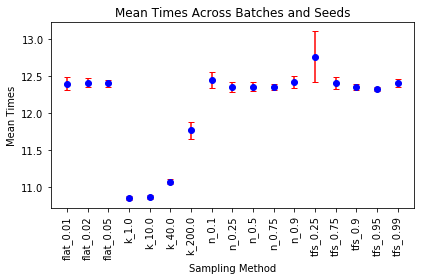

In [98]:
  
plt.figure()
x_pos = np.arange(flat_vals.shape[0])
plt.errorbar(x_pos, flat_vals['mean'], flat_vals['err'], ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xticks(x_pos, flat_vals['names'])
plt.ylabel('Mean Times')
plt.xlabel('Sampling Method')
plt.xticks(rotation=90)
plt.title('Mean Times Across Batches and Seeds')
plt.tight_layout()
plt.show()

## The biggest difference is: 

In [100]:
flat_vals['mean'].max() - flat_vals['mean'].min()

1.920053186826408

In [101]:
(flat_vals['mean'].max() - flat_vals['mean'].min()) / 25 # per sample as 25 to a batch. 

0.07680212747305631

In [104]:
(1000*0.07680212747305631)/60 # extra minutes per 1,000 samples.

# nucleus is just as slow. 

1.2800354578842719

In [39]:
batch_means = times.groupby(['sampling_method', 'param'])[[1,2,3]].mean()

In [56]:
batch_means.head()

0          1          2          3
sampling_method param                                            
flat            0.01   16.215725  12.525602  12.396859  12.409767
                0.02   15.910221  12.524244  12.434491  12.419304
                0.05   15.838367  12.451982  12.442392  12.451572
k               1.00   14.306127  10.880292  10.885554  10.888318
                10.00  14.264286  10.890991  10.841183  10.864420

In [57]:
batch_means.mean(axis=1)-(1.96*(batch_means.std(axis=1) /np.sqrt(4) ))

sampling_method  param 
flat             0.01      11.538010
                 0.02      11.630527
                 0.05      11.635110
k                1.00      10.063581
                 10.00     10.049711
                 40.00     10.144171
                 200.00    10.228144
n                0.10      11.704478
                 0.25      11.549688
                 0.50      11.568113
                 0.75      11.565181
                 0.90      11.680794
tfs              0.25      12.013684
                 0.75      11.587649
                 0.90      11.553275
                 0.95      11.470608
                 0.99      11.564164
dtype: float64

In [42]:
means = batch_means.mean(axis=1)
means

sampling_method  param 
flat             0.01      13.386988
                 0.02      13.322065
                 0.05      13.296078
k                1.00      11.740073
                 10.00     11.715220
                 40.00     11.795864
                 200.00    11.862173
n                0.10      13.320894
                 0.25      13.284440
                 0.50      13.273992
                 0.75      13.266493
                 0.90      13.287941
tfs              0.25      13.612260
                 0.75      13.355315
                 0.90      13.266855
                 0.95      13.307575
                 0.99      13.370725
dtype: float64

In [47]:
means = means.reset_index()

In [52]:
means['names'] = means['sampling_method'] + '_'+ means['param'].apply(lambda x: str(x))

In [53]:
means.head()

,sampling_method,param,0,names
0,flat,0.01,13.386988,flat_0.01
1,flat,0.02,13.322065,flat_0.02
2,flat,0.05,13.296078,flat_0.05
3,k,1.00,11.740073,k_1.0
4,k,10.00,11.715220,k_10.0


Bar Plot of the Odds


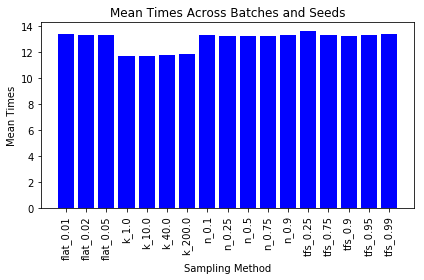

In [54]:
print('Bar Plot of the Odds')
    
plt.figure()
x_pos = np.arange(means.shape[0])
plt.bar(x_pos, means[0], color = 'blue')
plt.xticks(x_pos, means['names'])
plt.ylabel('Mean Times')
plt.xlabel('Sampling Method')
plt.xticks(rotation=90)
plt.title('Mean Times Across Batches and Seeds')
plt.tight_layout()
plt.show()

In [ ]:
# get standard errors for each of these. 